In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('disease_prediction_data.csv')
df

,Month,Temperature (°C),Humidity (%),Precipitation (mm),Disease Outcome
0,11,24,73,54,Flu
1,10,21,77,84,Cold
2,7,30,85,104,Malaria
3,12,32,68,128,Flu
4,9,28,85,110,Malaria
...,...,...,...,...,...
60,4,24,87,67,Flu
61,7,19,87,147,Cold
62,11,21,72,83,Flu
63,8,26,68,123,Flu


First 5 rows of the dataset:
   Month  Temperature (°C)  Humidity (%)  Precipitation (mm) Disease Outcome
0     11                24            73                  54             Flu
1     10                21            77                  84            Cold
2      7                30            85                 104         Malaria
3     12                32            68                 128             Flu
4      9                28            85                 110         Malaria

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month               65 non-null     int64 
 1   Temperature (°C)    65 non-null     int64 
 2   Humidity (%)        65 non-null     int64 
 3   Precipitation (mm)  65 non-null     int64 
 4   Disease Outcome     65 non-null     object
dtypes: int64(4), object(1)
memory usag

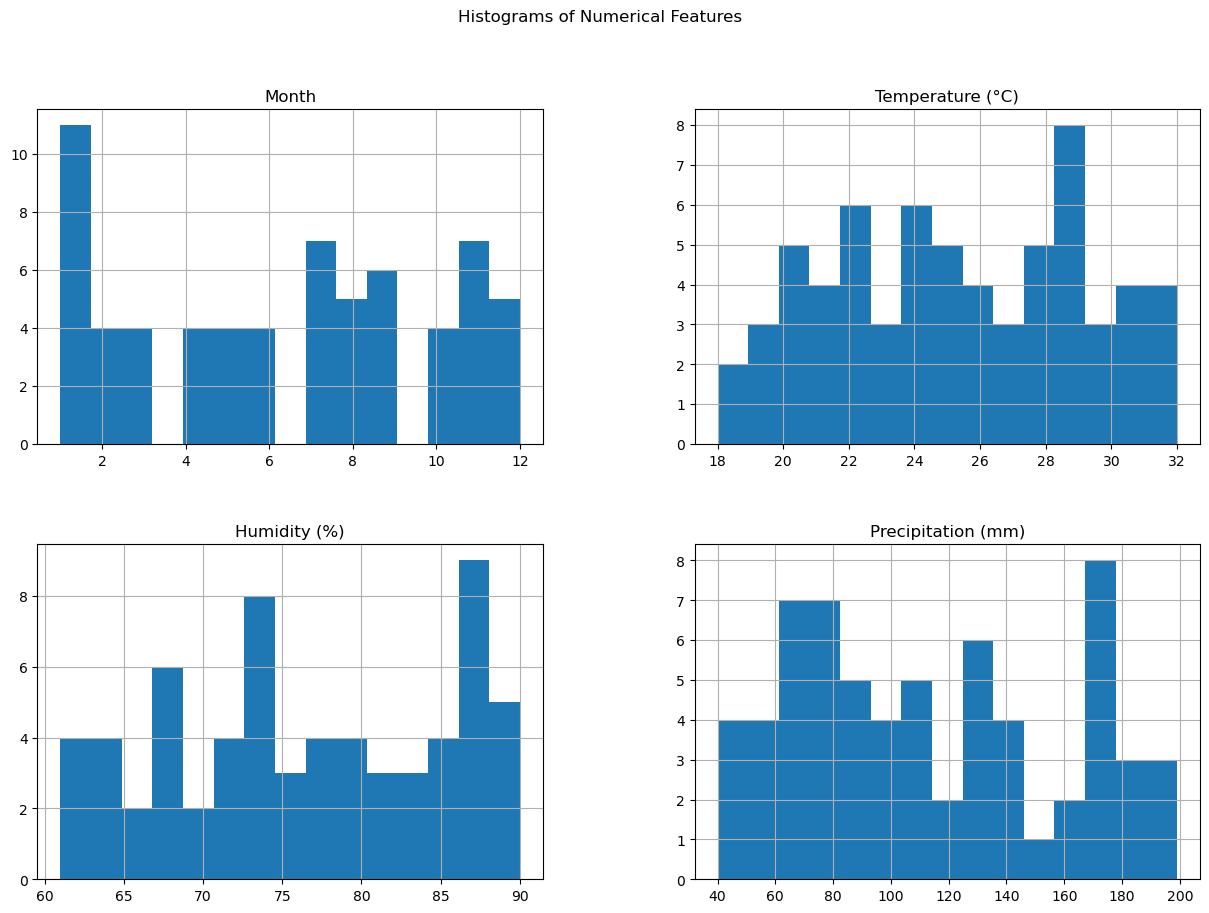

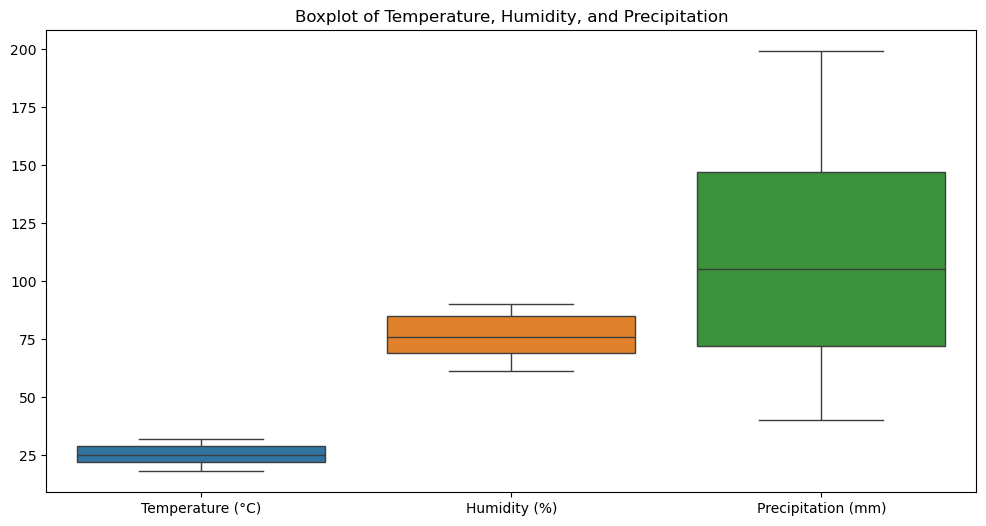

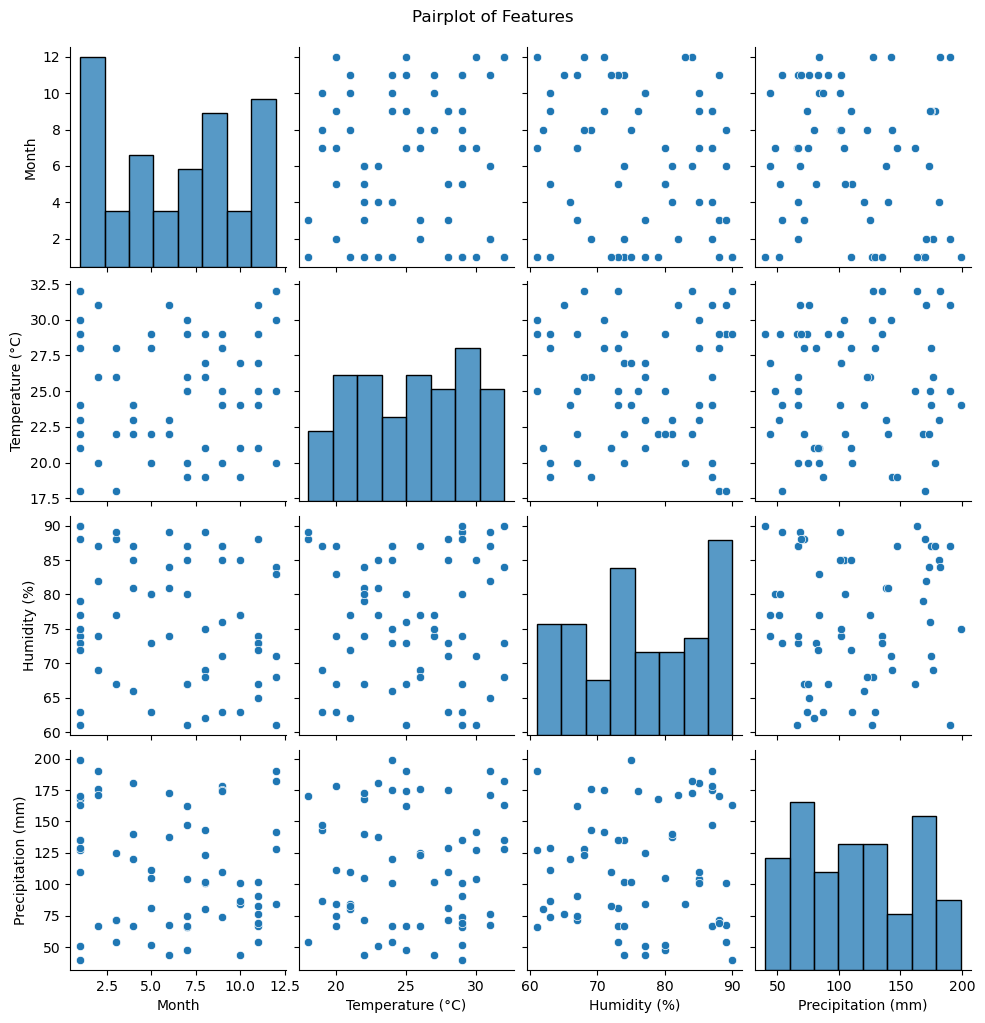

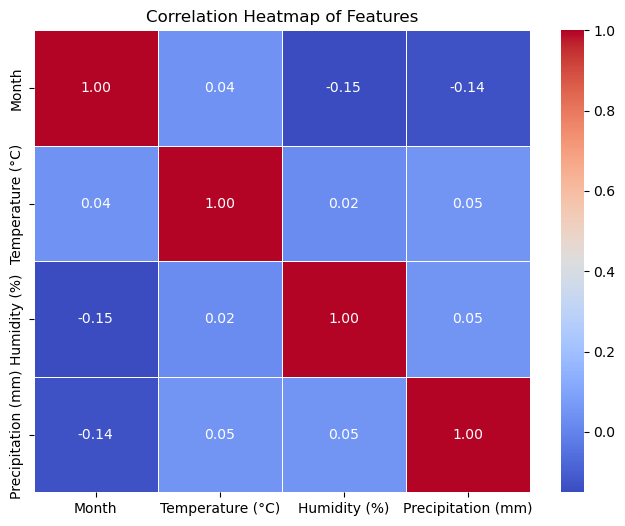

/var/folders/y3/y01h3w0s4sldyhwtlxfpx31c0000gn/T/ipykernel_16424/460315410.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Disease Outcome', data=df, palette='Set2')


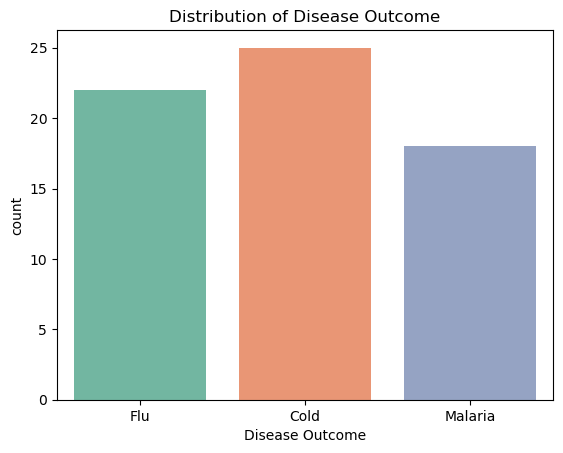

/var/folders/y3/y01h3w0s4sldyhwtlxfpx31c0000gn/T/ipykernel_16424/460315410.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disease Outcome', y='Temperature (°C)', data=df, palette='Set2')



Outliers in the dataset (Z-score > 3):
    Temperature (°C)  Humidity (%)  Precipitation (mm)
0              False         False               False
1              False         False               False
2              False         False               False
3              False         False               False
4              False         False               False
..               ...           ...                 ...
60             False         False               False
61             False         False               False
62             False         False               False
63             False         False               False
64             False         False               False

[65 rows x 3 columns]


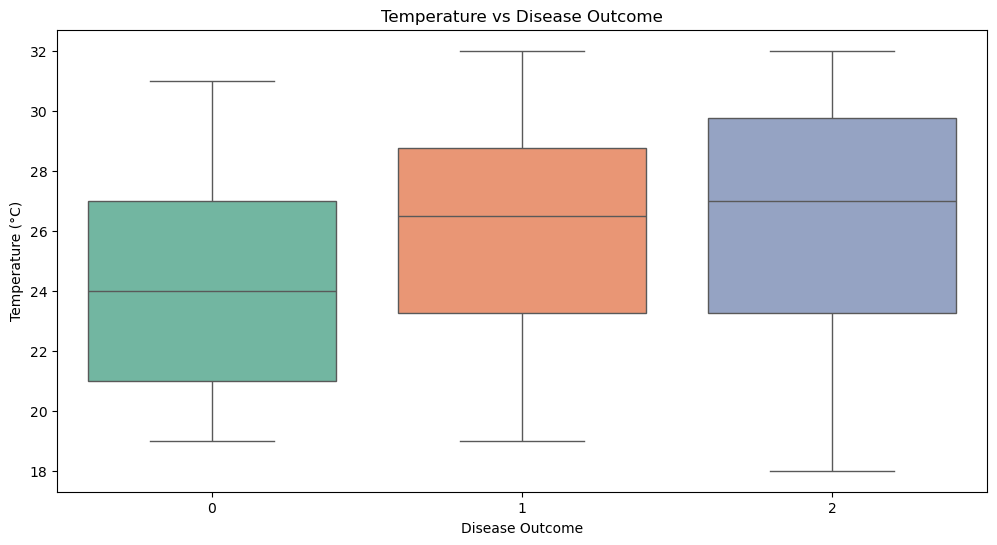

/var/folders/y3/y01h3w0s4sldyhwtlxfpx31c0000gn/T/ipykernel_16424/460315410.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disease Outcome', y='Humidity (%)', data=df, palette='Set2')


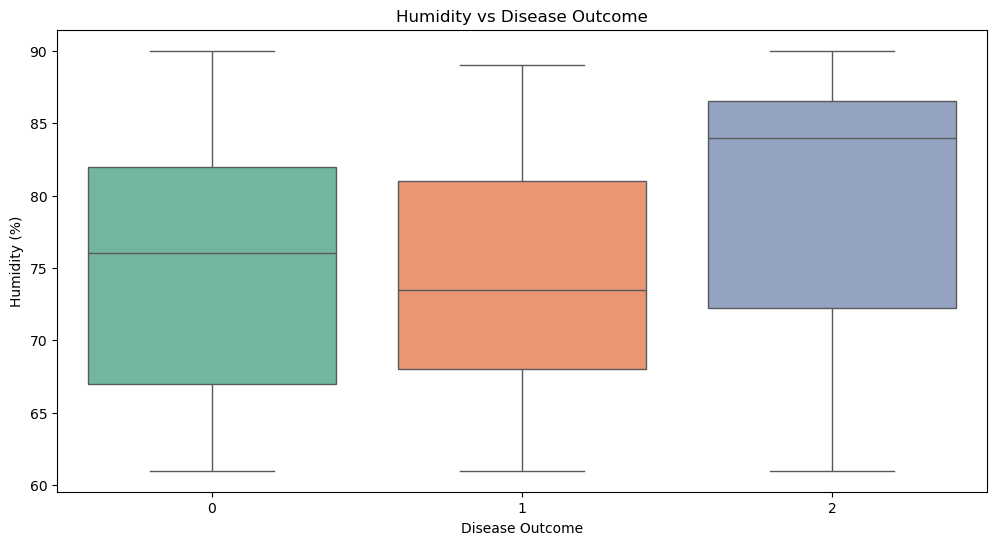

/var/folders/y3/y01h3w0s4sldyhwtlxfpx31c0000gn/T/ipykernel_16424/460315410.py:89: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disease Outcome', y='Precipitation (mm)', data=df, palette='Set2')


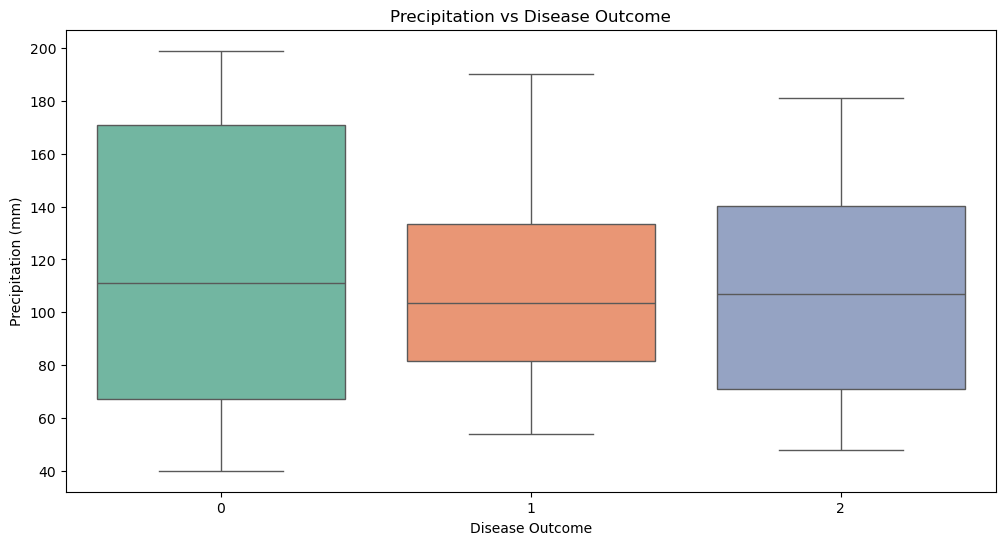

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset (assuming the dataset is already in a CSV file)
df = pd.read_csv('disease_prediction_data.csv')

# Step 1: Initial Exploration
print("First 5 rows of the dataset:")
print(df.head())

# Check for data types and missing values
print("\nData types and missing values:")
print(df.info())

# Check basic statistics for numerical features
print("\nBasic statistical summary for numerical features:")
print(df.describe())

# Step 2: Handle Missing Data
# Check if any missing values exist
print("\nMissing values in each column:")
print(df.isnull().sum())

# Fill missing values if any (for numerical columns, fill with mean)
# df.fillna(df.mean(), inplace=True)

# Step 3: Data Visualization
# Histogram for each numerical feature
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplot for numerical features to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Temperature (°C)', 'Humidity (%)', 'Precipitation (mm)']])
plt.title('Boxplot of Temperature, Humidity, and Precipitation')
plt.show()

# Step 4: Relationship between Features
# Pairplot to see the relationships between features
sns.pairplot(df[['Month', 'Temperature (°C)', 'Humidity (%)', 'Precipitation (mm)']])
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# Correlation matrix heatmap
correlation_matrix = df[['Month', 'Temperature (°C)', 'Humidity (%)', 'Precipitation (mm)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Step 5: Distribution of the target variable (Disease Outcome)
# Visualize the distribution of the target variable (Disease Outcome)
sns.countplot(x='Disease Outcome', data=df, palette='Set2')
plt.title('Distribution of Disease Outcome')
plt.show()

# Step 6: Checking Outliers
# Using Z-Score to detect outliers in numerical features
from scipy.stats import zscore

df_zscore = df[['Temperature (°C)', 'Humidity (%)', 'Precipitation (mm)']]
z_scores = np.abs(zscore(df_zscore))
outliers = (z_scores > 3)  # Threshold of 3 for outliers

print("\nOutliers in the dataset (Z-score > 3):")
print(outliers)

# Step 7: Encode categorical variable (Disease Outcome)
label_encoder = LabelEncoder()
df['Disease Outcome'] = label_encoder.fit_transform(df['Disease Outcome'])

# Step 8: Visualizing Relationships between Features and Target
# Boxplot for numerical features against Disease Outcome
plt.figure(figsize=(12, 6))
sns.boxplot(x='Disease Outcome', y='Temperature (°C)', data=df, palette='Set2')
plt.title('Temperature vs Disease Outcome')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Disease Outcome', y='Humidity (%)', data=df, palette='Set2')
plt.title('Humidity vs Disease Outcome')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Disease Outcome', y='Precipitation (mm)', data=df, palette='Set2')
plt.title('Precipitation vs Disease Outcome')
plt.show()

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset from the CSV file
df = pd.read_csv('disease_prediction_data.csv')

# Encode the categorical variable 'Disease Outcome' into numerical values
label_encoder = LabelEncoder()
df['Disease Outcome'] = label_encoder.fit_transform(df['Disease Outcome'])

# Define the input features (X) and the target variable (y)
X = df.drop('Disease Outcome', axis=1)
y = df['Disease Outcome']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model performance using accuracy, confusion matrix, and classification report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.6153846153846154
Confusion Matrix:
[[3 0 0]
 [2 3 0]
 [2 1 2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60         3
           1       0.75      0.60      0.67         5
           2       1.00      0.40      0.57         5

    accuracy                           0.62        13
   macro avg       0.73      0.67      0.61        13
weighted avg       0.77      0.62      0.61        13



In [5]:
# Function to predict disease based on new input data
def predict_disease(month, temperature, humidity, precipitation):
    # Prepare the input as a DataFrame
    input_data = pd.DataFrame({
        'Month': [month],
        'Temperature (°C)': [temperature],
        'Humidity (%)': [humidity],
        'Precipitation (mm)': [precipitation]
    })
    
    # Predict the disease outcome
    prediction = model.predict(input_data)
    
    # Decode the predicted class to the disease name
    disease = label_encoder.inverse_transform(prediction)
    return disease[0]

# Get user input for Month, Temperature, Humidity, and Precipitation
month_input = int(input("Enter the month (1 to 12): "))
temperature_input = float(input("Enter the temperature (°C): "))
humidity_input = float(input("Enter the humidity (%): "))
precipitation_input = float(input("Enter the precipitation (mm): "))

# Call the predict_disease function with user inputs
predicted_disease = predict_disease(month_input, temperature_input, humidity_input, precipitation_input)

# Output the result
print(f"The predicted disease for month {month_input}, temperature {temperature_input}°C, humidity {humidity_input}%, and precipitation {precipitation_input}mm is: {predicted_disease}")

The predicted disease for month 4, temperature 34.0°C, humidity 78.0%, and precipitation 56.0mm is: Malaria
